In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Overview
 In this project we will try building a supervised ML model that can destinguise between 3 Hand Gesture positions:  Synchronized, Alone And Spontaneous
 
 [for more read about Leap Motion Capture](https://developer-archive.leapmotion.com/documentation/python/devguide/Leap_Hand.html#getting-the-hand-characteristics)

# Data Loading

In [5]:
EvyatarSyn=pd.read_csv('training/Evyatar-Sync.csv')
EvyatarSync = EvyatarSyn.groupby([' Hand Type'], as_index=False)
EvyatarSyncy = pd.merge(EvyatarSync.get_group('right'), EvyatarSync.get_group('left'), on=' Frame ID')

NofarSyn=pd.read_csv('training/Nofar-Sync.csv')
NofarSync = NofarSyn.groupby([' Hand Type'], as_index=False)
NofarSyncy = pd.merge(NofarSync.get_group('right'), NofarSync.get_group('left'), on=' Frame ID')

OriyaSyn=pd.read_csv('training/Oriya-Sync.csv')
OriyaSync = OriyaSyn.groupby([' Hand Type'], as_index=False)
OriyaSyncy = pd.merge(OriyaSync.get_group('right'), OriyaSync.get_group('left'), on=' Frame ID')

Orya2Syn=pd.read_csv('training/Orya2-Sync.csv')
Orya2Sync = Orya2Syn.groupby([' Hand Type'], as_index=False)
Orya2Syncy = pd.merge(Orya2Sync.get_group('right'), Orya2Sync.get_group('left'), on=' Frame ID')

RevitalSyn=pd.read_csv('training/Revital-Sync.csv')
RevitalSync = RevitalSyn.groupby([' Hand Type'], as_index=False)
RevitalSyncy = pd.merge(RevitalSync.get_group('right'), RevitalSync.get_group('left'), on=' Frame ID')

SacharSyn=pd.read_csv('training/Sachar-Sync.csv')
SacharSync = SacharSyn.groupby([' Hand Type'], as_index=False)
SacharSyncy = pd.merge(SacharSync.get_group('right'), SacharSync.get_group('left'), on=' Frame ID')

ShellySyn=pd.read_csv('training/Shelly-Sync.csv')
ShellySync = ShellySyn.groupby([' Hand Type'], as_index=False)
ShellySyncy = pd.merge(ShellySync.get_group('right'), ShellySync.get_group('left'), on=' Frame ID')

YaelSyn=pd.read_csv('training/Yael-Sync.csv')
YaelSync = YaelSyn.groupby([' Hand Type'], as_index=False)
YaelSyncy = pd.merge(YaelSync.get_group('right'), YaelSync.get_group('left'), on=' Frame ID')

YoelSyn=pd.read_csv('training/Yoel-Sync.csv')
YoelSync = YoelSyn.groupby([' Hand Type'], as_index=False)
YoelSyncy = pd.merge(YoelSync.get_group('right'), YoelSync.get_group('left'), on=' Frame ID')

In [6]:
SyncTotal = pd.concat([EvyatarSyncy, NofarSyncy,OriyaSyncy,Orya2Syncy,RevitalSyncy,SacharSyncy,ShellySyncy,YaelSyncy,YoelSyncy], ignore_index=True)
SyncTotal['state'] = 1
### sync = 1

In [9]:
EvyatarSpontan=pd.read_csv('training/Evyatar-Spontan.csv')
EvyatarSpontanc = EvyatarSpontan.groupby([' Hand Type'], as_index=False)
EvyatarSpontancy = pd.merge(EvyatarSpontanc.get_group('right'), EvyatarSpontanc.get_group('left'), on=' Frame ID')

NofarSpontan=pd.read_csv('training/Nofar-Spontan.csv')
NofarSpontanc = NofarSpontan.groupby([' Hand Type'], as_index=False)
NofarSpontancy = pd.merge(NofarSpontanc.get_group('right'), NofarSpontanc.get_group('left'), on=' Frame ID')

OriyaSpontan=pd.read_csv('training/Oriya-Spontan.csv')
OriyaSpontanc = OriyaSpontan.groupby([' Hand Type'], as_index=False)
OriyaSpontancy = pd.merge(OriyaSpontanc.get_group('right'), OriyaSpontanc.get_group('left'), on=' Frame ID')

Orya2Spontan=pd.read_csv('training/Orya2-Spontan.csv')
Orya2Spontanc = Orya2Spontan.groupby([' Hand Type'], as_index=False)
Orya2Spontancy = pd.merge(Orya2Spontanc.get_group('right'), Orya2Spontanc.get_group('left'), on=' Frame ID')

RevitalSpontan=pd.read_csv('training/Revital-Spontan.csv')
RevitalSpontanc = RevitalSpontan.groupby([' Hand Type'], as_index=False)
RevitalSpontancy = pd.merge(RevitalSpontanc.get_group('right'), RevitalSpontanc.get_group('left'), on=' Frame ID')

SacharSpontan=pd.read_csv('training/Sachar-Spontan.csv')
SacharSpontanc = SacharSpontan.groupby([' Hand Type'], as_index=False)
SacharSpontancy = pd.merge(SacharSpontanc.get_group('right'), SacharSpontanc.get_group('left'), on=' Frame ID')

ShellySpontan=pd.read_csv('training/Shelly-Spontan.csv')
ShellySpontanc = ShellySpontan.groupby([' Hand Type'], as_index=False)
ShellySpontancy = pd.merge(ShellySpontanc.get_group('right'), ShellySpontanc.get_group('left'), on=' Frame ID')

YaelSpontan=pd.read_csv('training/Yael-Spontan.csv')
YaelSpontanc = YaelSpontan.groupby([' Hand Type'], as_index=False)
YaelSpontancy = pd.merge(YaelSpontanc.get_group('right'), YaelSpontanc.get_group('left'), on=' Frame ID')

YoelSpontan=pd.read_csv('training/Yoel-Spontan.csv')
YoelSpontanc = YoelSpontan.groupby([' Hand Type'], as_index=False)
YoelSpontancy = pd.merge(YoelSpontanc.get_group('right'), YoelSpontanc.get_group('left'), on=' Frame ID')

In [11]:
SpontancTotal = pd.concat([EvyatarSpontancy, NofarSpontancy,OriyaSpontancy,Orya2Spontancy,RevitalSpontancy,SacharSpontancy,ShellySpontancy,YaelSpontancy,YoelSpontancy], ignore_index=True)
SpontancTotal['state'] = 2
### spontan = 2

In [13]:
EvyatarAlone=pd.read_csv('training/Evyatar-Alone.csv')
NofarAlone=pd.read_csv('training/Nofar-Alone.csv')
OriyaAlone=pd.read_csv('training/Oriya-Alone.csv')
Orya2Alone=pd.read_csv('training/Orya2-Alone.csv')
RevitalAlone=pd.read_csv('training/Revital-Alone.csv')
SacharAlone=pd.read_csv('training/Sachar-Alone.csv')
ShellyAlone=pd.read_csv('training/Shelly-Alone.csv')
YaelAlone=pd.read_csv('training/Yael-Alone.csv')
YoelAlone=pd.read_csv('training/Yoel-Alone.csv')
royalone=pd.read_csv('training/RoyHandRight.csv')
totalalone = pd.concat([EvyatarAlone, NofarAlone,OriyaAlone,Orya2Alone,RevitalAlone,SacharAlone,ShellyAlone,YaelAlone,YoelAlone])
pd.concat([totalalone, royalone], axis=0)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,245.6524,118150,left,1,-83.904290,282.1872,38.419330,-118.12150,-114.9684,95.76973,...,1.811908,-146.5768,260.6764,13.99578,-325.0952,94.20402,-48.37575,0.462654,1.602441,0.0
1,245.6689,118152,left,1,-84.054030,278.0868,40.174600,43.63897,-290.1170,105.76040,...,1.837729,-147.4169,261.8600,13.90841,-329.0764,99.56168,-50.36576,0.398481,1.485933,0.0
2,245.6856,118154,left,1,-84.451820,273.9632,41.572880,-43.54573,-266.5999,68.69565,...,1.852311,-148.3286,263.1597,14.16020,-333.1124,105.56310,-52.84954,0.317113,1.368159,0.0
3,245.7021,118156,left,1,-85.140950,270.2009,42.844090,-41.25257,-207.2992,71.84576,...,1.859792,-149.2316,263.9030,14.82139,-336.9801,110.99990,-54.77203,0.207629,1.323227,0.0
4,245.7187,118158,left,1,-85.964490,265.8879,43.552970,-23.57351,-321.2827,26.17531,...,1.862292,-150.1089,263.1246,15.31940,-340.2092,113.92560,-55.91009,0.135171,1.227766,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.0852,-105.52950,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.3594,-20.70701,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.9019,28.88057,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.7344,80.56698,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.286526,0.0


In [15]:
alone_a = totalalone.groupby(' Hand Type')
Alone = pd.merge(alone_a.get_group('right'), alone_a.get_group('left'), on=' Frame ID')
Alone['state']=3
total = pd.concat([Alone,SpontancTotal,SyncTotal])


# Models

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [21]:
total.columns = total.columns.str.replace(' ', '')
total.dropna()
total.head()

,Time_x,FrameID,HandType_x,#hands_x,PositionX_x,PositionY_x,PositionZ_x,VelocityX_x,VelocityY_x,VelocityZ_x,...,WristPosX_y,WristPosY_y,WristPosZ_y,ElbowposX_y,ElbowPosY_y,ElbowPosZ_y,GrabStrenth_y,GrabAngle_y,PinchStrength_y,state
0,190.4787,22962,right,2,431.1257,275.9835,-80.78297,-168.4284,-57.91911,-174.04280,...,-118.7524,183.0150,22.42318,-297.5286,9.365108,-51.228690,0.737549,2.312544,0.000000,3
1,190.4787,22962,right,2,431.1257,275.9835,-80.78297,-168.4284,-57.91911,-174.04280,...,-243.2053,297.2995,53.35656,-406.6203,103.465500,2.479317,0.000000,0.555400,0.000000,3
2,197.2710,23746,right,2,370.4111,262.7153,-18.90903,-508.6987,-243.58170,30.69023,...,-106.2425,133.0763,40.89917,-352.6955,55.786160,22.469280,1.000000,3.070138,0.765765,3
3,197.2872,23747,right,2,367.5472,261.2895,-18.36172,-336.1371,-167.34880,64.23866,...,-106.4501,132.1770,40.82662,-351.4315,51.257290,18.722640,1.000000,3.050775,0.742822,3
4,197.2872,23747,right,2,367.5472,261.2895,-18.36172,-336.1371,-167.34880,64.23866,...,-210.7743,210.5318,-12.31740,-433.3799,79.677610,-17.984870,0.000000,0.317224,0.000000,3


In [27]:
total['state'] = total['state'].replace(np.nan, 0)
X = total[['PositionX_x','PositionY_x','PositionZ_x','GrabAngle_y']]
Y = total['state']
print("X size",X.shape)
print("Y size",Y.shape)

X size (75664, 4)
Y size (75664,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=666)

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

# Creating and training the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


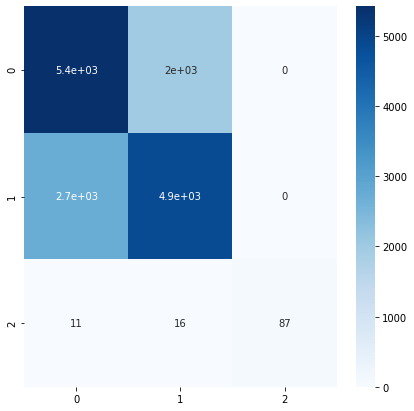

In [73]:
# Evaluate the model
import matplotlib.pyplot as plt
con_log = confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize = (7,7))
sns.heatmap(con_log, annot=True,cmap='Blues')
# fixing the cropped Heat Map

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 


In [74]:
con_log

array([[5421, 1982,    0],
       [2749, 4867,    0],
       [  11,   16,   87]], dtype=int64)

In [75]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           1       0.66      0.73      0.70      7403
           2       0.71      0.64      0.67      7616
           3       1.00      0.76      0.87       114

    accuracy                           0.69     15133
   macro avg       0.79      0.71      0.74     15133
weighted avg       0.69      0.69      0.69     15133



## XGBoost
[Further Read](https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7)

In [76]:
#pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Defining an XGBoost model

In [85]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 4} 

steps = 20  # The number of training iterations

In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. That format is called DMatrix. It’s a very simple one-linear to transform a numpy array of data to DMatrix format:

In [86]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [87]:
model_xgboost = xgb.train(param, D_train, steps)


In [91]:

preds = model_xgboost.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8433920233938927
Recall = 0.8154416174740845
Accuracy = 0.7606555210467191


In [95]:
print(classification_report(y_test, best_preds))

              precision    recall  f1-score   support

           1       0.80      0.68      0.74      7403
           2       0.73      0.84      0.78      7616
           3       1.00      0.93      0.96       114

    accuracy                           0.76     15133
   macro avg       0.84      0.82      0.83     15133
weighted avg       0.77      0.76      0.76     15133



<img src="F1-SCORE.png" />